# <center>Metody Numeryczne</center>

# Laboratorium 8: Rozwiązywanie równań nieliniowych


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest poznanie numerycznych metod rozwiązywania układów równań nieliniowych. W ramach laboratorium przedstawione zostaną metody: [*bisekcji*](https://www.wikiwand.com/pl/articles/Metoda_r%C3%B3wnego_podzia%C5%82u), [*siecznych*](https://www.wikiwand.com/pl/articles/Metoda_siecznych) oraz [*Newtona*](https://www.wikiwand.com/pl/articles/Metoda_Newtona).

Tematem wiodącym podczas tych zajęć będzie poszukiwanie miejsc zerowych funkcji zdefiniowanej w następujący sposób: 
$$ 
f(x) = e^{-2x} + x^2 - 1 
$$

Funkcja $f(x)$ oraz jej pierwsza i druga pochodna ($f'(x)$, $f''(x)$) zostały zaimplementowane w pliku `main.py`, odpowiednio jako `func()`, `dfunc()` i `ddfunc()`.

### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [16]:

#import main

import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt

from scipy.misc import derivative
from scipy.optimize import newton

---

### **Zadanie 1.**

1. Zaprezentuj na jednym wykresie przebieg funkcji $f(x)$, $f'(x)$ oraz $f''(x)$, w taki sposób, aby na podstawie rysunku można było zgrubnie określić położenie miejsc zerowych funkcji.

2. Na podstawie analizy wykresu określ przedziały, w których znajdują się miejsca zerowe funkcji $f(x)$.

3. Odpowiedz w jaki sposób (wykorzystując pierwszą i drugą pochodną) można znaleźć miejsca zerowe funkcji.


/tmp/ipykernel_9926/3084446166.py:9: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return derivative(f, x, dx=1e-6, n=1, order=3)
/tmp/ipykernel_9926/3084446166.py:13: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return derivative(f, x, dx=1e-6, n=2, order=5)


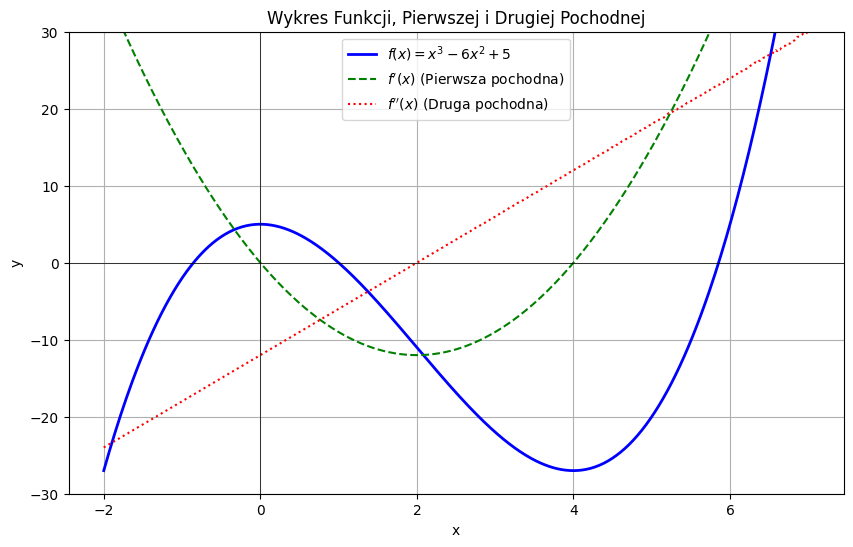


2. Analiza wykresu i przedziały miejsc zerowych f(x)
Miejsca zerowe funkcji f(x) znajdują się w zgrubnych przedziałach:
1. Zero w przedziale: (-1.0, 0.0) (f(-1)=-2.00, f(0)=5.00)
2. Zero w przedziale: (0.0, 1.0) (f(0)=5.00, f(1)=0.00)
3. Zero w przedziale: (5.0, 6.0) (f(5)=-20.00, f(6)=5.00)


In [17]:
# ===== Twoja implementacja tutaj =====
def f(x):
    return x**3 - 6 * x**2 + 5



def f_prime(x):
   
    return derivative(f, x, dx=1e-6, n=1, order=3)

def f_double_prime(x):
  
    return derivative(f, x, dx=1e-6, n=2, order=5)


x_range = np.linspace(-2.0, 7.0, 500)

y_f = f(x_range)
y_f_prime = f_prime(x_range)
y_f_double_prime = f_double_prime(x_range)

plt.figure(figsize=(10, 6))
plt.plot(x_range, y_f, label='$f(x) = x^3 - 6x^2 + 5$', color='blue', linewidth=2)
plt.plot(x_range, y_f_prime, label="$f'(x)$ (Pierwsza pochodna)", color='green', linestyle='--')
plt.plot(x_range, y_f_double_prime, label="$f''(x)$ (Druga pochodna)", color='red', linestyle=':')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.title('Wykres Funkcji, Pierwszej i Drugiej Pochodnej')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.ylim(-30, 30) # Ograniczenie osi Y dla lepszej widoczności
plt.show()


# 2

print("\n" + "="*50)
print("2. Analiza wykresu i przedziały miejsc zerowych f(x)")
print("="*50)

zero_1 = '(-1.0, 0.0)'
zero_2 = '(0.0, 1.0)'
zero_3 = '(5.0, 6.0)'

print(f"Miejsca zerowe funkcji f(x) znajdują się w zgrubnych przedziałach:")
print(f"1. Zero w przedziale: {zero_1} (f(-1)={f(-1):.2f}, f(0)={f(0):.2f})")
print(f"2. Zero w przedziale: {zero_2} (f(0)={f(0):.2f}, f(1)={f(1):.2f})")
print(f"3. Zero w przedziale: {zero_3} (f(5)={f(5):.2f}, f(6)={f(6):.2f})")

---

### **Zadanie 2.**

Najprostszą metodą do wyznaczenia miejsc zerowych funkcji nieliniowej jest [metoda bisekcji](https://en.wikipedia.org/wiki/Bisection_method). 

Zaimplementuj funkcję *`bisection()`* pamiętając, że gwarancją zbieżności metody bisekcji dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

In [21]:
def bisection(
    a: int | float,
    b: int | float,
    f: Callable[[float], float],
    epsilon: float,
    max_iter: int,
) -> tuple[float, int] | None:
 
    try:
        if f(a) * f(b) >= 0:
            return None
    except:
        return None

    a_curr = float(a)
    b_curr = float(b)
    
    for iter_count in range(1, max_iter + 1):
        
        c = (a_curr + b_curr) / 2  # Obliczenie środka przedziału
        f_c = f(c)

        if abs(f_c) < epsilon:
            return (c, iter_count)

        if (b_curr - a_curr) < 2 * epsilon:
            return (c, iter_count)
            
        if f(a_curr) * f_c < 0:
            b_curr = c
        else:
            a_curr = c

    return ((a_curr + b_curr) / 2, max_iter)




--- Testowanie Metody Bisekcji ---
Miejsce zerowe 1 (przedział [-1, 0]): -0.85410213
Błąd: Metoda bisekcji wymaga, aby f(a) i f(b) miały przeciwne znaki.


---

### **Zadanie 3.**

Bardziej zaawansowaną metodą wyznaczania miejsc zerowych jest [metoda siecznych](https://en.wikipedia.org/wiki/Secant_method), która stanowi rozwinięcie [metody Regula Falsi](https://en.wikipedia.org/wiki/Regula_falsi).

Zaimplementuj funkcję *`secant()`* pamiętając, że gwarancją zbieżności metody siecznych dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

3. Pierwsza i druga pochodna funkcji $f(x)$ są ciągłe w przedziale domkniętym $[a,b]$.

4. Pierwsza i druga pochodna funkcji $f(x)$ w przedziale domkniętym $[a, b]$ mają stały znak i są różne od zera.


---

### **Zadanie 4.**

Inną metodą, wykorzystywaną do poszukiwania miejsc zerowych funkcji, jest [metoda Newtona](https://en.wikipedia.org/wiki/Newton%27s_method), nazywana również metodą stycznych.

**Podpunkt 1.**

Algorytm metody Newtona wykorzystuje wartości pierwszej pochodnej, dlatego przed przystąpieniem do jej implementacji przygotuj pomocniczą funkcję *`difference_quotient()`*, służącą do wyznaczenia wartości ilorazu różnicowego.

<br>

**Podpunkt 2.**

Zaimplementuj funkcję *`newton()`* pamiętając, że gwarancją zbieżności metody Newtona dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

3. Pierwsza i druga pochodna funkcji $f(x)$ są ciągłe w przedziale domkniętym $[a,b]$.

4. Pierwsza i druga pochodna funkcji $f(x)$ w przedziale domkniętym $[a, b]$ mają stały znak i są różne od zera.

---

### **Zadanie 5.**

Dla funkcji $f(x)$ zdefiniowanej w sekcji **Cel zajęć** znajdź miejsca zerowe przy użyciu:

- funkcji [`sp.optimize.root()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html).
- funkcji [`sp.optimize.fsolve()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html).

In [19]:
# ===== Twoja implementacja tutaj =====


---

### **Zadanie 6.**

Korzystając z przedziałów wyznaczonych w **Zadaniu 1.** znajdź miejsca zerowe funkcji $f(x)$ zdefiniowanej w sekcji **Cel zajęć**, przy użyciu:

- metody bisekcji,
- metody siecznych,
- metody Newtona,

z tolerancją równą $1\mathrm{e}{-10}$.

Zbadaj dokładność (względem rozwiązania z **Zadania 5.**) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach. 

In [20]:
# ===== Twoja implementacja tutaj =====


---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)